In [1]:
# csv 파일 주소
data_csv_url = './csv_data/emotion_data3.csv'

# split train_ds, validation_ds, test_ds

In [2]:
import pandas as pd

In [3]:
data_pd = pd.read_csv(data_csv_url)

data_pd.head(20)

,Unnamed: 0,Sentence,test
0,0,언니 동생으로 부르는게 맞는 일인가요..??,괴로움
1,1,그냥 내 느낌일뿐겠지?,괴로움
2,2,아직너무초기라서 그런거죠?,괴로움
3,3,유치원버스 사고 낫다던데,괴로움
4,4,근데 원래이런거맞나요,괴로움
5,5,남자친구가 떠날까봐요,괴로움
6,6,이거 했는데 허리가 아플수도 있나요? ;;,괴로움
7,7,내가불안해서꾸는걸까..,괴로움
8,8,일주일도 안 남았당...ㅠㅠ,괴로움
9,9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,괴로움


In [4]:
# Data 컬럼, 데이터 shape 조회
data_pd.columns, data_pd.shape

(Index(['Unnamed: 0', 'Sentence', 'test'], dtype='object'), (42729, 3))

## 데이터를 무작위로 섞고, 컬럼명을 변경해준다

In [5]:
# 컬럼 명 변경
data_pd = data_pd.rename(columns={'Sentence': 'sentence', 'test': 'label'})

# Unnamed 컬럼 제거
data_pd = data_pd.drop('Unnamed: 0', axis=1)

# 데이터를 무작위로 섞어준다
shuffled_data = data_pd.sample(frac=1)
shuffled_data.head(20)

,sentence,label
9985,우리는 백년안애 다시돌아와 너희를 통치할것이다.,중립
25865,어떤 정치인과 관련되어 있는지 조사해보면 나옴,중립
11177,어디 투자함?,중립
5238,흐앙ㅠㅠ고치는법좀요,괴로움
26208,이렇게 된 이상 민사로는 이빠이 당겨야된다,중립
26180,전에 애플 영업이익 비교해가며 망한다고 방송한곳도 엠비씨 아님? ㅋ,중립
38741,잘난 남의편이라고 남편이라 살고 있는데 너무 피곤해요 남들은 다부러워하지만 뭘하나...,싫음
32605,"내일도,내일 모래두....기분좋은 하루 되세요...^^",행복
3553,고민 되네요.....,괴로움
22144,초코우유좋다해서먹었는데..,슬픔


## 커스텀 Dataset을 이용해서 PyTorch 학습, 검증, 테스트 데이터셋 생성

## 학습 데이터셋 클래스 분포 확인

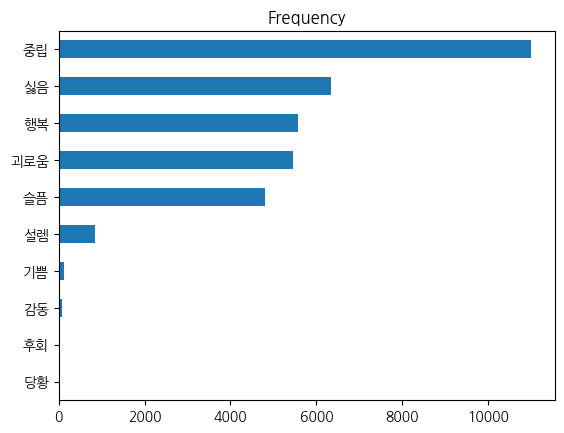

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정

train_df['label'].value_counts(ascending=True).plot.barh()
plt.title('Frequency')
plt.show()

In [89]:
from transformers import AutoModelForSequenceClassification
from tokenization_kobert import KoBertTokenizer

model = AutoModelForSequenceClassification.from_pretrained('monologg/distilkobert')
tokenizer = KoBertTokenizer.from_pretrained('monologg/distilkobert')

Some weights of the model checkpoint at monologg/distilkobert were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classifier

In [90]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [91]:
# extract labels
id2label = {}
label2id = {}

for i, label in enumerate(shuffled_data.label.unique()):
    id2label[i] = label
    label2id[label] = i

In [100]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, df, label2id):
        self.data = df.values
        self.label2id = label2id
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        result = self.data[idx, 0]
        result = tokenizer(result, truncation=True, return_token_type_ids=False)
        label = self.data[idx, -1]
        label = self.label2id[label]
        result['label'] = label
        
        return result

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, SubsetRandomSampler
import random

# pandas 데이터를 train, validation, test로 나눈다 (약 8:1:1 비율로 생성)
train_df, test_df = train_test_split(shuffled_data, test_size=0.1, random_state=42)
train_df, validation_df = train_test_split(train_df, test_size=0.11, random_state=42)

# Dataset 생성
train_ds, validation_ds, test_ds = CustomDataset(train_df, label2id), CustomDataset(validation_df, label2id), CustomDataset(test_df, label2id)

train_ds.__getitem__(0), validation_ds.__getitem__(0)

({'input_ids': [2, 3010, 5561, 7850, 4003, 6383, 5782, 54, 3], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1], 'label': 0},
 {'input_ids': [2, 3093, 7682, 6553, 3650, 6285, 6812, 6183, 5761, 0, 3], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'label': 4})

In [102]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding='longest')

In [103]:
# Evalate
import evaluate

accuracy = evaluate.load('accuracy')

In [104]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, labels=labels)

In [105]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "monologg/distilkobert", num_labels=len(id2label), id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at monologg/distilkobert were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classifier

In [106]:
model.config

DistilBertConfig {
  "_name_or_path": "monologg/distilkobert",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "\uc911\ub9bd",
    "1": "\uad34\ub85c\uc6c0",
    "2": "\uc2eb\uc74c",
    "3": "\ud589\ubcf5",
    "4": "\uc2ac\ud514",
    "5": "\uc124\ub818",
    "6": "\uac10\ub3d9",
    "7": "\uae30\uc068",
    "8": "\ub2f9\ud669",
    "9": "\ud6c4\ud68c"
  },
  "initializer_range": 0.02,
  "label2id": {
    "\uac10\ub3d9": 6,
    "\uad34\ub85c\uc6c0": 1,
    "\uae30\uc068": 7,
    "\ub2f9\ud669": 8,
    "\uc124\ub818": 5,
    "\uc2ac\ud514": 4,
    "\uc2eb\uc74c": 2,
    "\uc911\ub9bd": 0,
    "\ud589\ubcf5": 3,
    "\ud6c4\ud68c": 9
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 3,
  "pad_token_id": 1,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weight

In [109]:
import numpy as np

training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=4e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=30,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_strategy="steps",
    eval_steps=1000, 
    save_steps=1000,
    save_total_limit=10,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=validation_ds,
#    tokenizer=tokenizer,
    data_collator=data_collator,
    # compute_metrics=compute_metrics,
)

trainer.train()

/home/elicer/.local/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
1000,0.767600,1.085683
2000,0.889000,1.044170
3000,0.718300,1.135978
4000,0.714900,1.104194
5000,0.650200,1.115530
6000,0.658600,1.067738
7000,0.517600,1.131999
8000,0.547900,1.125430
9000,0.436100,1.200435
10000,0.433000,1.199078


TrainOutput(global_step=64200, training_loss=0.20025618886650537, metrics={'train_runtime': 7415.0101, 'train_samples_per_second': 138.469, 'train_steps_per_second': 8.658, 'total_flos': 1.1583758150471976e+16, 'train_loss': 0.20025618886650537, 'epoch': 30.0})

In [ ]:
import transformers

transformers.__version__

In [ ]:
tokenizer("동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라 만세 무궁화 삼천리 화려강산 대한사람 대한으로 길이 보전하세")

In [ ]:
# 파이프라인 가져올 때 model은 사용중인 model을 주면 댐
# pipeline(‘sentiment-analysis’, model=model, tokenizer=tokenizer)

In [ ]:
# yhat = trainer.predict(test_ds)
# print(yhat)

# predictions = yhat[‘predictions’]
# labels = yhat[‘labels’]
# predictions = np.argmax(predictions, axis=1)
# accuracy.compute(predictions=predictions, references=labels)